In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Laboratorio 1 Text Mining & Image Reconigtion
### Jherson Sazo
### 21000341

## Problema 1
Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la
función debe devolver una imagen la cual tenga activos los canales de color según los siguientes
puntos:  

* Si el parametro color vale 1, la imagen debe mostrar activos unicamente el color azul.
* Si el parametro color vale 2, la imagen debe mostrar activos unicamente el color verde.
* Si el parametro color vale 3, la imagen debe mostrar activos unicamente el color rojo.
* Si el parametro color vale 10, la imagen debe mostrar activos unicamente los colores rojo y
verde.
* Si el parametro color vale 20, la imagen debe mostrar activos unicamente los colores verde y
azul.
* Si el parametro color vale 30, la imagen debe mostrar activos unicamente los colores azul y
rojo.

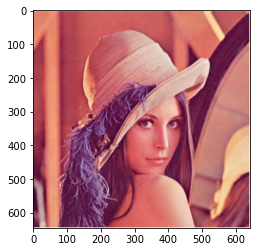

In [124]:
#imagen a utilizar en las pruebas
img = read_picture_from_disk('juana.jpg')
show_picture(img)

In [37]:
def get_active_colors(img, col):
    
    alto= img.shape[0]
    ancho = img.shape[1]
    
    img_salida = np.zeros((alto,ancho,3))
    
    
    if col == 1:
        for i in range(0, alto):
            for j in range(0,ancho):
                pixel = img[i,j]
                red = pixel[0]
                img_salida[i,j]=[red,0,0]
        
    elif col==2:
        for i in range(0, alto):
            for j in range(0,ancho):
                pixel = img[i,j]
                green = pixel[1]
                img_salida[i,j]=[0,green,0]
    elif col==3:
        for i in range(0, alto):
            for j in range(0,ancho):
                pixel = img[i,j]
                red = pixel[0]
                img_salida[i,j]=[0,0,red]
    elif col==10:
        for i in range(0, alto):
            for j in range(0,ancho):
                pixel = img[i,j]
                red = pixel[0]
                green = pixel[1]
                img_salida[i,j]=[0,green,red]
    elif col==20:
        for i in range(0, alto):
            for j in range(0,ancho):
                pixel = img[i,j]
                blue  = pixel[2]
                green = pixel[1]
                img_salida[i,j]=[blue,green,0]
    elif col==30:
        for i in range(0, alto):
            for j in range(0,ancho):
                pixel = img[i,j]
                blue = pixel[2]
                red = pixel[0]
                img_salida[i,j]=[blue,0,red]
    return img_salida
    

In [16]:
def show_picture(img, mapper=None):#opencv lee en BGR, matplotlib en RGB
    if mapper:
        plt.imshow(img, cmap=mapper)
    else:
        plt.imshow(img)

In [17]:
def write_picture_disk(path_plus_name,img):
    cv2.imwrite(path_plus_name,img)
    

In [18]:
def read_picture_from_disk(path_plus_name):
    img_temp = cv2.imread(path_plus_name)
    img_temp = cv2.cvtColor(img_temp, cv2.COLOR_BGR2RGB)
    return img_temp

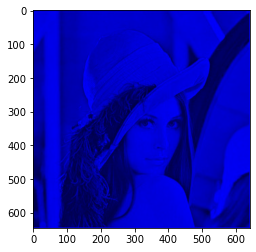

In [24]:
#Test 1: mostrar canal azul
pic_blue = get_active_colors(img,1)
write_picture_disk('juana_blue.jpg',pic_blue)
show_picture(read_picture_from_disk('juana_blue.jpg'))

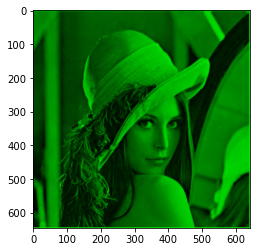

In [27]:
#Test 2: mostrar canal verde
pic_green = get_active_colors(img,2)
write_picture_disk('juana_green.jpg',pic_green)
show_picture(read_picture_from_disk('juana_green.jpg'))

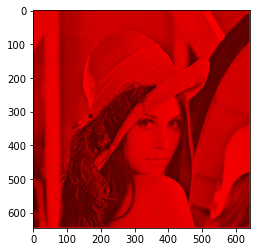

In [31]:
#Test 3: mostrar canal rojo
pic_red = get_active_colors(img,3)
write_picture_disk('juana_red.jpg',pic_red)
show_picture(read_picture_from_disk('juana_red.jpg'))

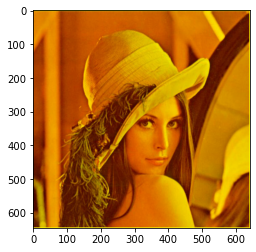

In [38]:
#Test 4: mostrar canal rojo y verde 
pic_rg = get_active_colors(img,10)
write_picture_disk('juana_rg.jpg',pic_rg)
show_picture(read_picture_from_disk('juana_rg.jpg'))

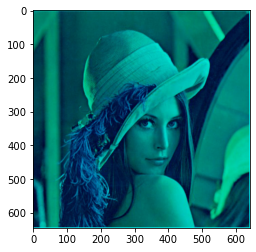

In [39]:
#Test 5: mostrar canal verde y azul
pic_bg = get_active_colors(img,20)
write_picture_disk('juana_bg.jpg',pic_bg)
show_picture(read_picture_from_disk('juana_bg.jpg'))

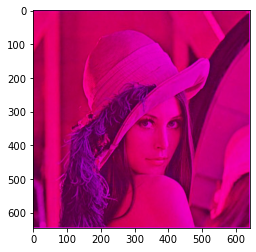

In [41]:
#Test 5: mostrar canal verde y azul
pic_br = get_active_colors(img,30)
write_picture_disk('juana_br.jpg',pic_br)
show_picture(read_picture_from_disk('juana_br.jpg'))

## Problema 2  

En el .zip del laboratorio se le compartió un conjunto de imágenes en escala de grises, estas imágenes
fueron creadas utilizando una escala de grises en 3D, cree una función que dadas las 3 imágenes se
construya la imagen original a color.

In [95]:
def join_gray_pictures(img_r,img_g,img_b):
    alto= img_r.shape[0]
    ancho = img_r.shape[1]
    
    img_salida = np.zeros((alto,ancho,3))
    
    for i in range(0, alto):
        for j in range(0,ancho):
            img_salida[i,j] = [img_b[i,j,0],img_g[i,j,0],img_r[i,j,0]]
    return img_salida

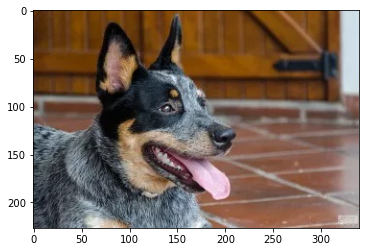

In [96]:
img_r = read_picture_from_disk('./perro/perro_salida_gray_rojo.jpg')
img_g = read_picture_from_disk('./perro/perro_salida_gray_verde.jpg')
img_b = read_picture_from_disk('./perro/perro_salida_gray_azul.jpg')

img_joined = join_gray_pictures(img_r,img_g,img_b)
write_picture_disk('perro_join.jpg',img_joined)
show_picture(read_picture_from_disk('perro_join.jpg'))

## Problema 3:  

Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su función debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir
una las imágenes que haya

In [92]:
def convert_to_gray_scales(img):
    alto= img.shape[0]
    ancho = img.shape[1]
    
    gray_green = np.zeros((alto,ancho,1))
    gray_blue = np.zeros((alto,ancho,1))
    gray_red  = np.zeros((alto,ancho,1))

    
    for i in range(0, alto):
        for j in range(0,ancho):
            pixel = img[i,j]
            gray_blue[i,j] = pixel[2]
            gray_green[i,j] = pixel[1]
            gray_red[i,j] = pixel[0]

    return [gray_red,gray_green,gray_blue]

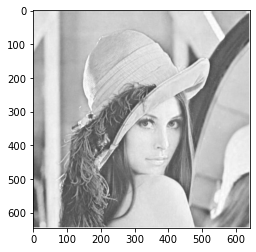

In [142]:
gray_scales = convert_to_gray_scales(img)
write_picture_disk('juana_gray_red.jpg',gray_scales[0])
show_picture(read_picture_from_disk('juana_gray_red.jpg'))


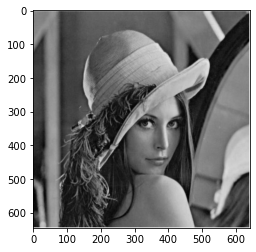

In [143]:
write_picture_disk('juana_gray_green.jpg',gray_scales[1])
show_picture(read_picture_from_disk('juana_gray_green.jpg'))

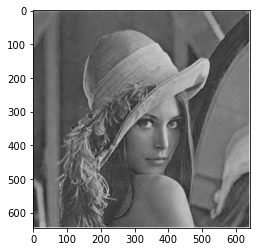

In [144]:
write_picture_disk('juana_gray_blue.jpg',gray_scales[2])
show_picture(read_picture_from_disk('juana_gray_blue.jpg'))

## Problema 4
Cree una función que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una línea vertical la cual muestre el valor de la media
de la distribución.


In [115]:
def append_value_dict(dicct,key):
    if key in dicct:
        dicct[key] = dicct[key]+1
    else:
        dicct[key] = 1
    

In [125]:
def return_histogram_colors_data(img):
    alto= img.shape[0]
    ancho = img.shape[1]
    
    gray_aritmetica = np.zeros((alto,ancho,1))
    
    red_hist   = {}
    green_hist = {}
    blue_hist  = {}
    gray_hist  = {}
    
    for i in range(0, alto):
        for j in range(0,ancho):
            pixel = img[i,j]
            
            append_value_dict(red_hist,pixel[2])
            append_value_dict(green_hist,pixel[1])
            append_value_dict(blue_hist,pixel[0])
            append_value_dict(gray_hist,np.mean(pixel))
    return [red_hist,green_hist,blue_hist,gray_hist]
        

In [126]:
histograms_data = return_histogram_colors_data(img)

In [137]:
def plot_histogram_graph(dicct,col):
    plt.bar(list(dicct.keys()), dicct.values(), color=col)
    
    x_vals = [0,255]
    y_vals = [np.mean(list(dicct.values())),np.mean(list(dicct.values()))]
    
    plt.plot(x_vals, y_vals)
    
    plt.legend(["Media","Histograma"])
    plt.show()

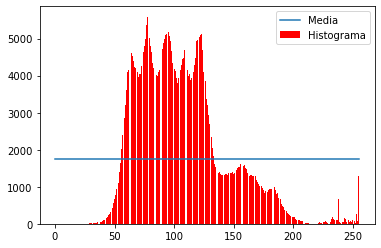

In [138]:
#histograma  monocromo rojo
plot_histogram_graph(histograms_data[0],'r')

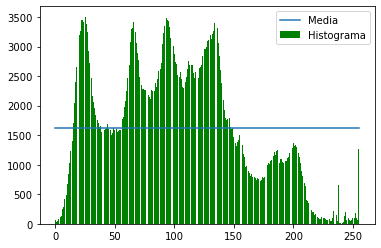

In [139]:
#histograma  monocromo verde
plot_histogram_graph(histograms_data[1],'g')

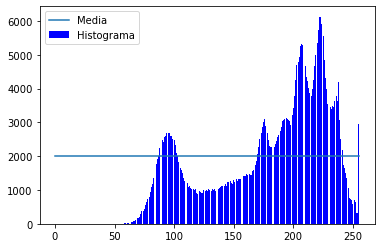

In [140]:
#histograma  monocromo azul
plot_histogram_graph(histograms_data[2],'b')

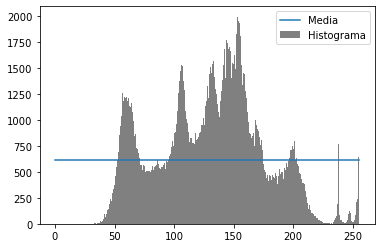

In [141]:
#histograma  monocromo gris aritmetico
plot_histogram_graph(histograms_data[3],'gray')


## Problema 5  

Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una
función que dada una imagen, realice una escala de grises ponderada (notar que no existe una
solución unica).

In [103]:
def pounded_gray(img, red_val,gree_val,blue_val):
    
    alto= img.shape[0]
    ancho = img.shape[1]
    
    gray_ponderado = np.zeros((alto,ancho,1))
    
    for i in range(0, alto):
        for j in range(0,ancho):
            pixel = img[i,j]
            gray_ponderado[i,j] = int(red_val*pixel[2]+ gree_val*pixel[1]+ blue_val*pixel[0])
    return gray_ponderado

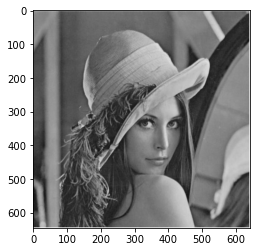

In [107]:
#En los modelos Y’UV y Y’IQ utilizados por PAL y NTSC, el componente rec601 luma (Y ‘) se calcula como
#Y = 0.299*r + 0.584*g + 0.114*b
pal_ntsc = pounded_gray(img,0.299,0.584,0.114)
write_picture_disk('juana_ntsc.jpg',pal_ntsc)
show_picture(read_picture_from_disk('juana_ntsc.jpg'))



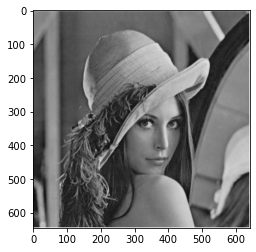

In [108]:
# El estándar ITU-R BT.709 utilizado para HDTV desarrollado por el ATSC usa diferentes coeficientes de color, 
#computando el componente luma como
#Y = 0.2126*r + 0.7152*g + 0.0722*b
hdtv = pounded_gray(img,0.2126,0.7152,0.0722)
write_picture_disk('juana_hdtv.jpg',hdtv)
show_picture(read_picture_from_disk('juana_hdtv.jpg'))

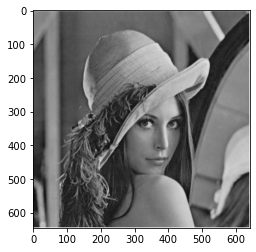

In [109]:
#El estándar ITU-R BT.2100 para televisión HDR utiliza aún diferentes coeficientes, calculando el componente luma como
#Y = 0.2627*r + 0.6780*g + 0.0593*b
hdr = pounded_gray(img,0.2627,0.6780,0.0593)
write_picture_disk('juana_hdr.jpg',hdtv)
show_picture(read_picture_from_disk('juana_hdr.jpg'))

## Problema 6
Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho
espacio, para entregar este ejercicio puede hacer con un archivo PDF.

**Espacio de color HSV**  

Representación tridimensional del color basado en los componentes de tinte, matiz o tonalidad (hue, en inglés), saturación (saturation) y brillo o valor (value).

Fue definido en 1978 por Alvy Ray Smith.

A diferencia del modelo RGB ampliamente usado en los monitores, televisores, etc., si bien las coordenadas de aquel son euclideanas; el color HSV sigue una representación más parecida a las coordenadas cilíndricas. Además es una representación más cercana a la forma en que los humanos perciben los colores y sus propiedades, pues se agrupan las tonalidades de color, lo cual es distinto al caso RGB donde los colores no están necesariamente tan agrupados.  

Es una transformación no lineal del modelo RGB en coordenadas cilíndricas de manera que cada color viene definido por las siguientes dimensiones:  
* **Tinte o matiz**: Ángulo que representa el matiz, normalmente definido entre 0 y 360 grados.
* **Saturación**: Nivel saturación del color, dado entre 0 y 1, 0 representa sin saturación alguna (blanco), hasta 1 que sería el matiz en toda su intensidad. Es común también darlo en percentiles 0%-100%.
* **Brillo**: Nivel del brillo entre 0 y 1. 0 es negro; 1, blanco. Al igual que la saturación puede darse en porcientos entre 0% y 100%. De esta forma el 50% indica el nivel medio o normal del brillo del color.

Existen diferencias entre los modelos HSV y RGB en la formulación de sus componentes desde el mismo color RGB que se traducen en cambios sustanciales. El principal elemento diferencial que se alude es el hecho de que en HSV la luminancia y la saturación son muy interdependientes, sucediendo que el mínimo nivel de saturación no produce el gris equivalente sino un color blanco que le resta el valor de intuitividad a la saturación.

**IMPORTANCIA**  
El desarrollo de las tecnologías de cómputo, tarjetas gráficas y las aplicaciones de procesamiento de imagen, de diseño asistido por computadoras, videojuegos han probado la utilidad de los modelos HSV y preferentemente del HSL para los humanos por su representación más intuitiva del color.